In [1]:
"""
Purpose: To see if we can split a merge error at node with degree 4


"""

'\nTo see if we can split a merge error at node with degree 4\n\n\n'

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")

In [3]:
from importlib import reload

import neuron_utils as nru

import neuron

import neuron_visualizations as nviz

import time

import datajoint_utils as du
du = reload(du)

INFO - 2020-11-27 09:33:31,759 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2020-11-27 09:33:31,760 - settings - Setting database.user to celiib
INFO - 2020-11-27 09:33:31,761 - settings - Setting database.password to newceliipass
INFO - 2020-11-27 09:33:31,766 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2020-11-27 09:33:31,767 - settings - Setting database.user to celiib
INFO - 2020-11-27 09:33:31,768 - settings - Setting database.password to newceliipass


In [4]:
import neuron_visualizations as nviz
curr_seg_id = 864691134884742394
minnie,schema = du.configure_minnie_vm()

INFO - 2020-11-27 09:33:34,553 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2020-11-27 09:33:34,554 - settings - Setting enable_python_native_blobs to True
INFO - 2020-11-27 09:33:34,567 - connection - Connected celiib@at-database.ad.bcm.edu:3306


Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2020-11-27 09:33:34,798 - settings - Setting enable_python_native_blobs to True


In [5]:
neuron_obj = (minnie.Decomposition() & dict(segment_id=curr_seg_id)).fetch1("decomposition")
ret_col = nviz.visualize_neuron(neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict=dict(L0="all"),
                     return_color_dict=True)

INFO - 2020-11-27 09:33:56,045 - settings - Setting enable_python_native_blobs to True
INFO - 2020-11-27 09:33:56,226 - settings - Setting enable_python_native_blobs to True


Decompressing Neuron in minimal output mode...please wait

 Working on visualization type: mesh

 Working on visualization type: skeleton
Working on  new stand alone scatter points


# Getting the Seperated Graphs

In [6]:
"""
Find path to cut:
1) Get the concept network
2) Get all of the starting nodes for somas
3) Get the shortest path between each combination of starting nodes

"""
def get_best_cut_edge(curr_limb_graph,cut_path):
    return [18,17]


import itertools
import networkx as nx
import copy

verbose = True

curr_limb_idx = 0
curr_limb = neuron_obj[curr_limb_idx]
curr_limb_graph = copy.deepcopy(curr_limb.concept_network)

#2) Get all of the starting nodes for somas
all_starting_nodes = [k["starting_node"] for k in curr_limb.all_concept_network_data]

starting_node_combinations = list(itertools.combinations(all_starting_nodes,2))

for st_n_1,st_n_2 in starting_node_combinations:
    # need to keep cutting until no path for them
    if verbose:
        print(f"---- working on disconnecting {st_n_1} and {st_n_2}")
        
    counter = 0
    while True:
        if verbose:
            print(f" Cut iteration {counter}")
        try:
            soma_to_soma_path = nx.shortest_path(curr_limb_graph,st_n_1,st_n_2)
        except:
            print("No valid path so just skipping ")
            break

        if verbose:
            print(f"Shortest path = {soma_to_soma_path}")

        # say we found the cut node to make
        cut_edge = get_best_cut_edge(curr_limb_graph,soma_to_soma_path)
        curr_limb_graph.remove_edge(*cut_edge)
        
        counter += 1


seperated_graphs = list(nx.connected_components(curr_limb_graph))
print(f"Total number of graphs at the end of the split = {len(seperated_graphs)}")



---- working on disconnecting 2 and 62
 Cut iteration 0
Shortest path = [2, 1, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 62]
in remove edge
 Cut iteration 1
No valid path so just skipping 
Total number of graphs at the end of the split = 2


# Seeing where the Error actually takes place

In [15]:
curr_errors =soma_to_soma_path
highlight_color = [1,0,0,1]
ret_col = nviz.visualize_neuron(neuron_obj,
                      visualize_type=["mesh","skeleton"],#,"network"],
                     limb_branch_dict=dict(L0="all"),
                      mesh_color={"L0":dict([(k,highlight_color) for k in curr_errors])},
                      #mesh_color = "green",
                      mesh_fill_color="green",
                      #skeleton_color="green",
                      skeleton_fill_color="green",
                      return_color_dict=True
                      
                      
                     )


 Working on visualization type: mesh

 Working on visualization type: skeleton
Working on  new stand alone scatter points


In [16]:
"""
Idea: 

1) Compute the skeletal lengths of all the nodes along the path
2) If any of them are below 2000, then for it's neighbors (add )

"""

np.where([sk.calculate_skeleton_distance(curr_limb[k].skeleton) for k in soma_to_soma_path]

[2434.1470383387677,
 6162.963583262284,
 106742.16786034638,
 3322.806044352965,
 1530.8802199237853,
 29530.020645523684,
 9455.988306791083,
 15603.710888495363,
 9306.275438368164,
 4050.9616781843756,
 3519.5473891017214,
 25087.46008301597,
 71551.572678828]

In [14]:
import skeleton_utils as sk
sk.calculate_skeleton_distance(neuron_obj[0][20].skeleton)

1530.8802199237853

In [13]:
nviz.plot_objects(meshes=[neuron_obj[0][20].mesh,neuron_obj[0][21].mesh,neuron_obj[0][19].mesh])

No limb name was given so using L0 because was the limb in the first key


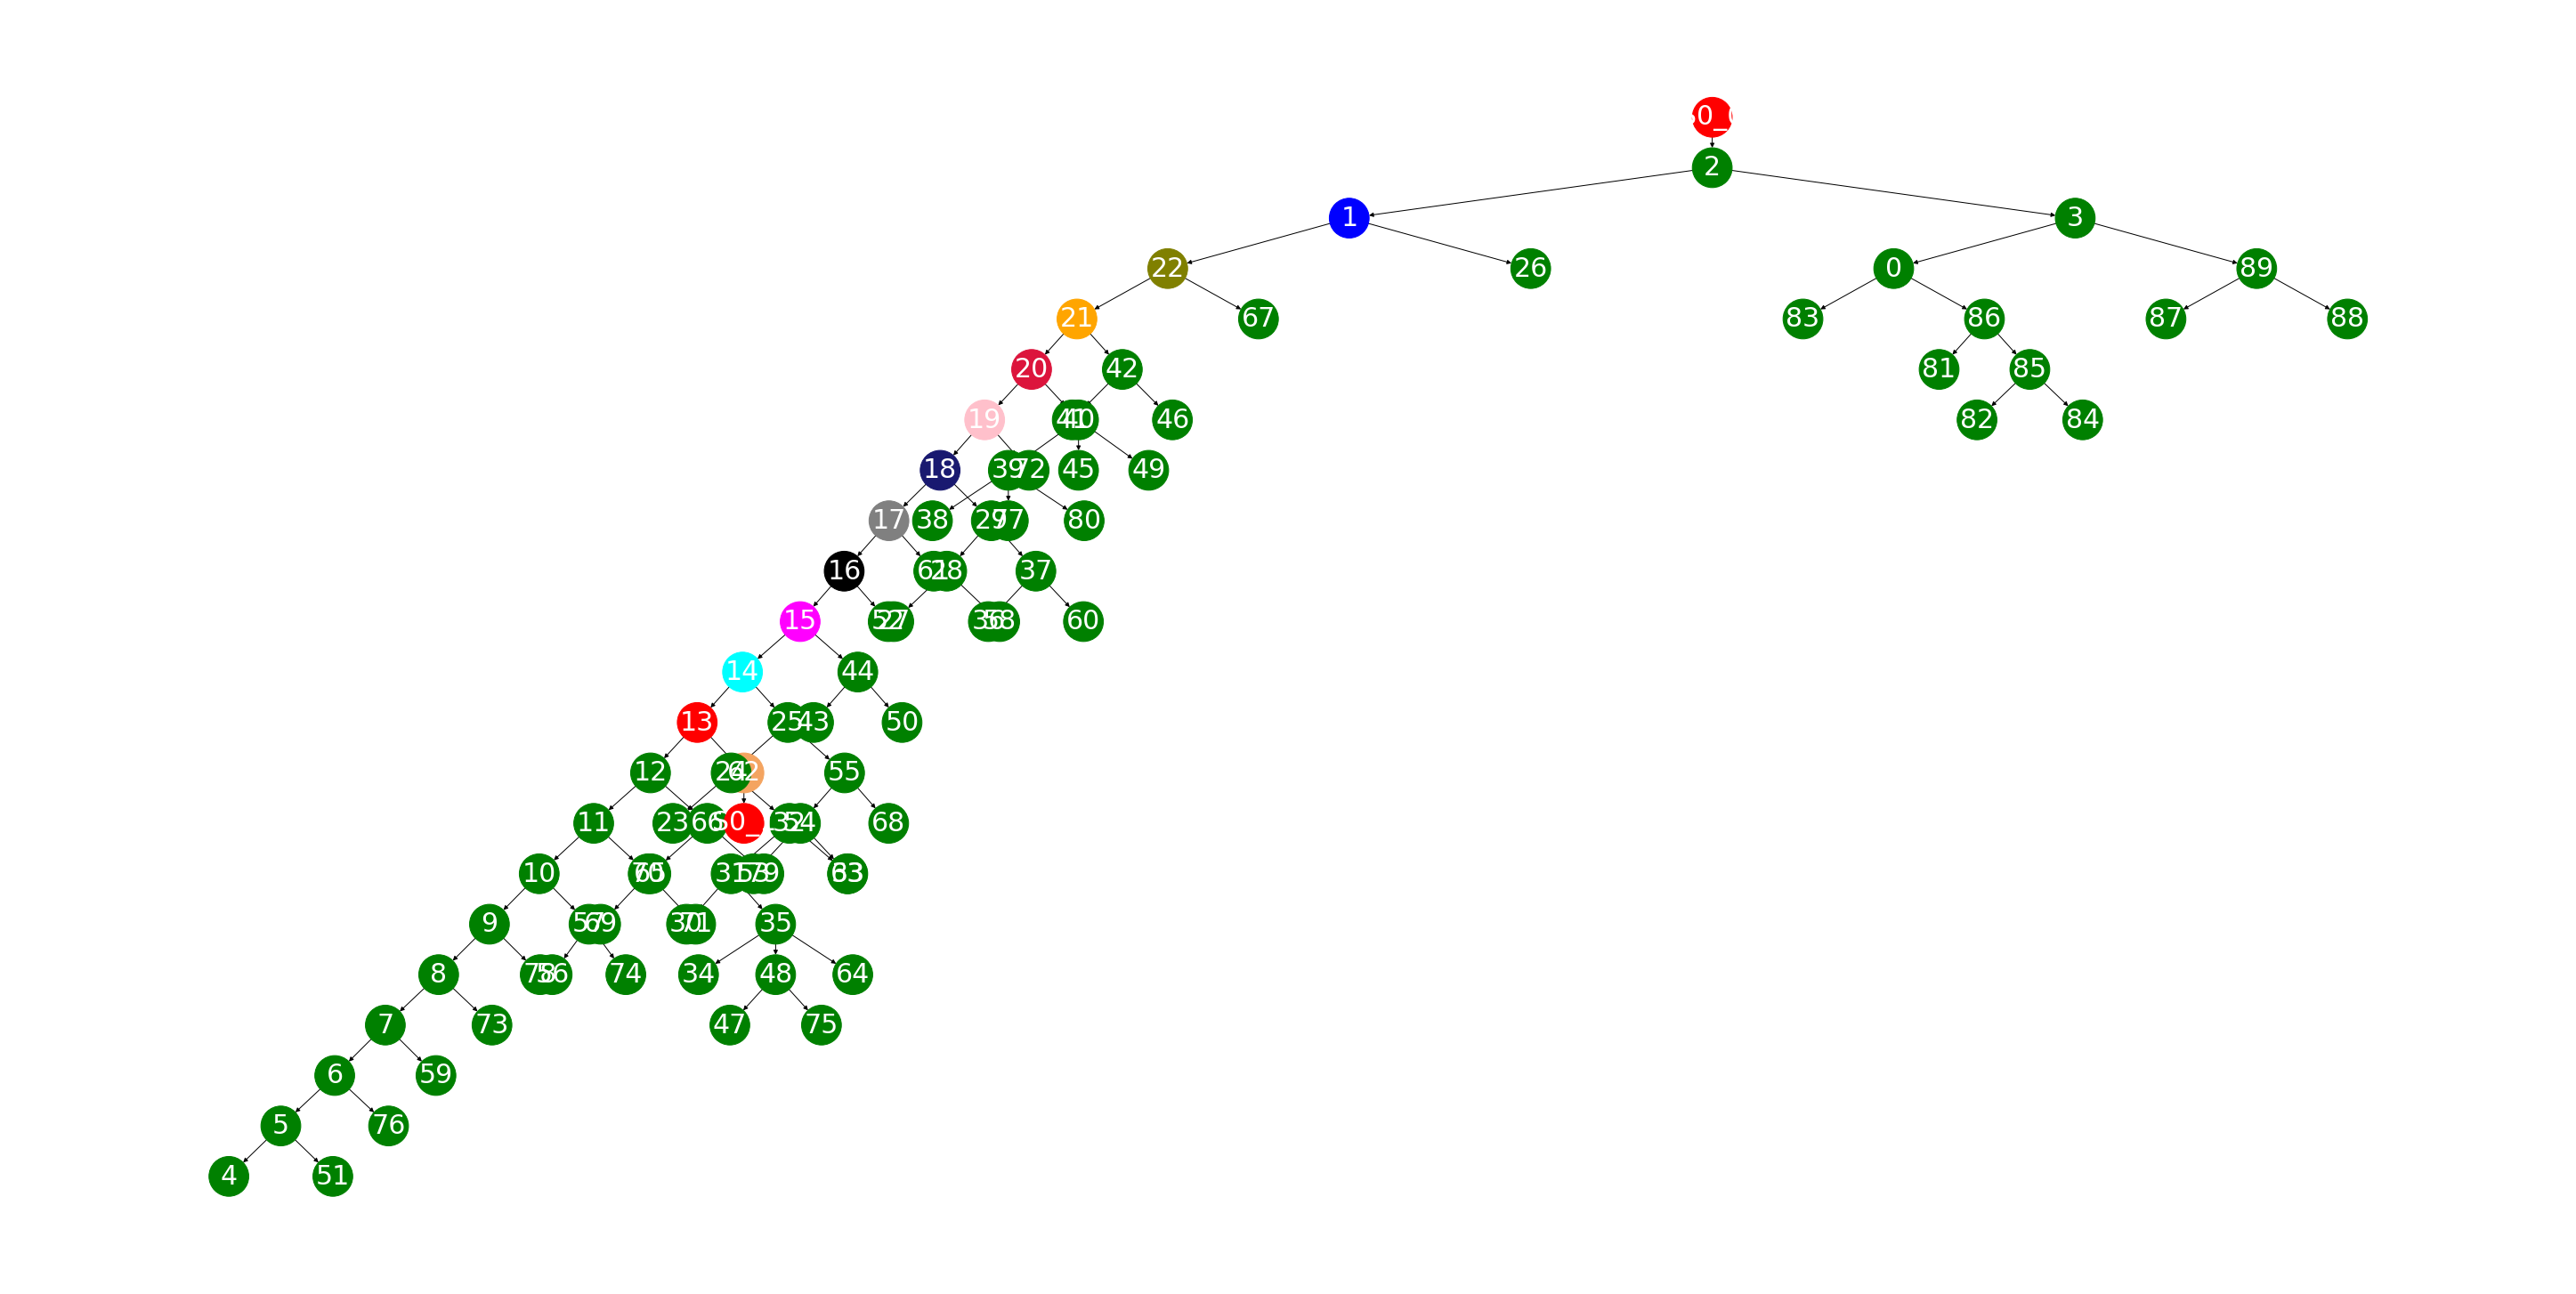

In [12]:
nviz.plot_limb_concept_network_2D(neuron_obj,node_colors=ret_col)

In [ ]:
"""
Question to ask ourselves: 
Can we combine the nodes of branches that are smaller
"""

# Getting the Degrees of the connection path

In [18]:
import networkx_utils as xu
xu.get_node_degree(neuron_obj[0].concept_network,node_name=soma_to_soma_path)

[2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1]